## Assignments for Week-03

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*

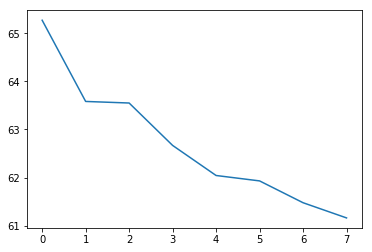

[65.27031346911514, 63.58223734191427, 63.54961397233013, 62.66819672278069, 62.0429012683984, 61.93049549843734, 61.47690751721734, 61.16105726560104]


In [101]:
# 1. Random Choose Method to get optimal k* and *b
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

content = pd.read_csv('/Users/xianghang/Downloads/titanic/train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

def randomChoose(count, data):
    _randomselect = lambda : (random.random()*20-10, random.random()*20-10)
    _genFunc = lambda k,b: lambda x: k*x+b
    _calcLoss = lambda k,b: np.mean(np.abs(data['y'] - _genFunc(k,b)(data['x'])))
    
    k_init, b_init = _randomselect()
    good = k_init, b_init, float('inf')
    losses = []
    for _ in range(count):
        k, b = _randomselect()
        loss = _calcLoss(k,b)
        if loss < good[2]:
            good = k, b, loss
            losses.append(loss)
    return losses

losses = randomChoose(1000, {'x': sub_age, 'y': sub_fare})

plt.plot(range(len(losses)), losses)
plt.show()

print(losses)
    
    

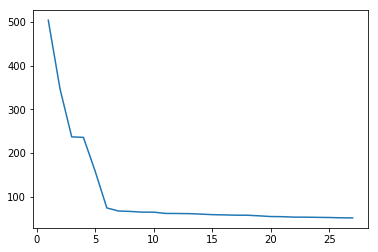

[57.52755359394877, 56.15197807557035, 54.5288651224465, 54.21999461353556, 53.160303644296555, 53.06564760364766, 52.67156917639827, 52.31746309730429, 51.61156437419397, 51.379287266968994]


In [97]:
# 2.Supervised Direction to get optimal k* and *b
def supervisedDir(count, data, step):
    _randomselect = lambda : (random.random()*20-10, random.random()*20-10)
    _genFunc = lambda k,b: lambda x: k*x+b
    _calcLoss = lambda k,b: np.mean(np.abs(data['y'] - _genFunc(k,b)(data['x'])))
    _genOnDir = lambda best_dir: (random.random()*best_dir[0]*step, random.random()*best_dir[1]*step)
    _getBestDir = lambda r: ([(1,1),(1,-1),(-1,-1),(-1,1)][r.index(min(res))], min(r))
    _randomDir = lambda : random.choice([(1,1),(1,-1),(-1,-1),(-1,1)])
    
    good_k, good_b = _randomselect()
    losses = [float('inf')]
    good_dir = _randomDir()
    for _ in range(count):
        # new k,b
        dk, db = _genOnDir(good_dir)
        k, b = good_k+dk, good_b+db
        loss = _calcLoss(k,b)
        
        if loss < losses[-1]:
            losses.append(loss)
            good_k, good_b = k, b
        else:
            good_dir = _randomDir()
        
    return losses
        
losses = supervisedDir(1000, {'x': sub_age, 'y': sub_fare}, 10)
plt.plot(range(len(losses)), losses)
plt.show()
print(losses[-10:])

go= -3.9300686595175147 -5.356624280318121
go= -7.740594975306989 -5.256624280318121
go= -11.551121291096463 -5.1566242803181215
go= -15.361647606885937 -5.056624280318122
go= -19.172173922675412 -4.956624280318122
go= -22.982700238464886 -4.8566242803181225
go= -26.79322655425436 -4.756624280318123
go= -30.603752870043834 -4.656624280318123
go= -34.41427918583331 -4.556624280318124
go= -38.22480550162278 -4.456624280318124
go= -42.035331817412256 -4.356624280318124
go= -45.84585813320173 -4.256624280318125
go= -49.656384448991204 -4.156624280318125
go= -53.46691076478068 -4.056624280318125
go= -57.27743708057015 -3.9566242803181253
go= -61.087963396359626 -3.856624280318125
go= -64.8984897121491 -3.756624280318125
go= -68.70901602793857 -3.656624280318125
go= -72.51954234372805 -3.556624280318125
go= -76.33006865951752 -3.456624280318125
go= -80.140594975307 -3.3566242803181248
go= -83.95112129109647 -3.2566242803181247
go= -87.76164760688594 -3.1566242803181246
go= -91.57217392267542

go= -929.8879633963646 18.943375719681878
go= -933.6984897121541 19.04337571968188
go= -937.5090160279436 19.14337571968188
go= -941.3195423437331 19.243375719681882
go= -945.1300686595226 19.343375719681884
go= -948.9405949753121 19.443375719681885
go= -952.7511212911016 19.543375719681887
go= -956.5616476068911 19.643375719681888
go= -960.3721739226806 19.74337571968189
go= -964.1827002384701 19.84337571968189
go= -967.9932265542596 19.943375719681892
go= -971.8037528700492 20.043375719681894
go= -975.6142791858387 20.143375719681895
go= -979.4248055016282 20.243375719681897
go= -983.2353318174177 20.343375719681898
go= -987.0458581332072 20.4433757196819
go= -990.8563844489967 20.5433757196819
go= -994.6669107647862 20.643375719681902
go= -998.4774370805757 20.743375719681904
go= -1002.2879633963652 20.843375719681905
go= -1006.0984897121547 20.943375719681907
go= -1009.9090160279442 21.043375719681908
go= -1013.7195423437337 21.14337571968191
go= -1017.5300686595232 21.243375719681

go= -1832.9827002384766 42.64337571968221
go= -1836.793226554266 42.74337571968221
go= -1840.6037528700556 42.843375719682214
go= -1844.414279185845 42.943375719682216
go= -1848.2248055016346 43.04337571968222
go= -1852.035331817424 43.14337571968222
go= -1855.8458581332136 43.24337571968222
go= -1859.656384449003 43.34337571968222
go= -1863.4669107647926 43.44337571968222
go= -1867.277437080582 43.543375719682224
go= -1871.0879633963716 43.643375719682226
go= -1874.898489712161 43.74337571968223
go= -1878.7090160279506 43.84337571968223
go= -1882.51954234374 43.94337571968223
go= -1886.3300686595296 44.04337571968223
go= -1890.1405949753191 44.14337571968223
go= -1893.9511212911086 44.243375719682234
go= -1897.7616476068981 44.343375719682236
go= -1901.5721739226876 44.44337571968224
go= -1905.3827002384771 44.54337571968224
go= -1909.1932265542666 44.64337571968224
go= -1913.0037528700561 44.74337571968224
go= -1916.8142791858456 44.84337571968224
go= -1920.6248055016351 44.943375719

go= -2652.2458581332194 64.14337571968251
go= -2656.056384449009 64.2433757196825
go= -2659.8669107647984 64.3433757196825
go= -2663.677437080588 64.44337571968249
go= -2667.4879633963774 64.54337571968249
go= -2671.298489712167 64.64337571968248
go= -2675.1090160279564 64.74337571968248
go= -2678.919542343746 64.84337571968247
go= -2682.7300686595354 64.94337571968246
go= -2686.540594975325 65.04337571968246
go= -2690.3511212911144 65.14337571968245
go= -2694.161647606904 65.24337571968245
go= -2697.9721739226934 65.34337571968244
go= -2701.782700238483 65.44337571968244
go= -2705.5932265542724 65.54337571968243
go= -2709.403752870062 65.64337571968242
go= -2713.2142791858514 65.74337571968242
go= -2717.024805501641 65.84337571968241
go= -2720.8353318174304 65.94337571968241
go= -2724.64585813322 66.0433757196824
go= -2728.4563844490094 66.1433757196824
go= -2732.266910764799 66.24337571968239
go= -2736.0774370805884 66.34337571968238
go= -2739.887963396378 66.44337571968238
go= -2743

go= -3589.635331817437 88.74337571968111
go= -3593.4458581332265 88.8433757196811
go= -3597.256384449016 88.9433757196811
go= -3601.0669107648055 89.0433757196811
go= -3604.877437080595 89.14337571968109
go= -3608.6879633963845 89.24337571968108
go= -3612.498489712174 89.34337571968108
go= -3616.3090160279635 89.44337571968107
go= -3620.119542343753 89.54337571968107
go= -3623.9300686595425 89.64337571968106
go= -3627.740594975332 89.74337571968105
go= -3631.5511212911215 89.84337571968105
go= -3635.361647606911 89.94337571968104
go= -3639.1721739227005 90.04337571968104
go= -3642.98270023849 90.14337571968103
go= -3646.7932265542795 90.24337571968103
go= -3650.603752870069 90.34337571968102
go= -3654.4142791858585 90.44337571968101
go= -3658.224805501648 90.54337571968101
go= -3662.0353318174375 90.643375719681
go= -3665.845858133227 90.743375719681
go= -3669.6563844490165 90.84337571968099
go= -3673.466910764806 90.94337571968099
go= -3677.2774370805955 91.04337571968098
go= -3681.08

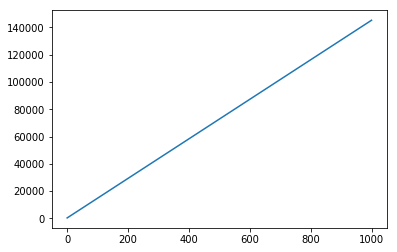

[143995.17478295256, 144140.27589098582, 144285.37699901906, 144430.47810705227, 144575.5792150855, 144720.68032311875, 144865.781431152, 145010.88253918526, 145155.9836472185, 145301.08475525174]


In [113]:
# 3.Gradient Descent to get optimal k* and *b

def gradDesc(count, data, lear_rate):
    derivate_k = lambda y, eta_y, x: np.mean([-xi*1 if yi - eta_yi else -xi*-1
                                                 for yi, eta_yi, xi in zip(y, eta_y, x)])
    derivate_b = lambda y, eta_y: np.mean([1 if yi - eta_yi > 0 else -1 
                                               for yi, eta_yi in zip(y, eta_y)])
    randomkb = lambda : (random.random()*20-10, random.random()*20-10)
    genFunc = lambda k,b: lambda x: k*x+b
    calcLoss = lambda k,b: np.mean(np.abs(data['y'] - genFunc(k,b)(data['x'])))
    
    losses = []
    k, b = randomkb()
    for _ in range(count):
        _func = genFunc(k,b)
        eta_y = _func(data['x'])
        
        dk = derivate_k(data['y'], eta_y, data['x'])
        db = derivate_b(data['y'], eta_y)
        k, b = k+dk*lear_rate, b+db*lear_rate
        print('go=',k,b)
        losses.append(calcLoss(k, b))
        
    return losses
        
losses = gradDesc(1000, {'x': sub_age, 'y': sub_fare}, 1e-1)
plt.plot(range(len(losses)), losses)
plt.show()
print(losses[-10:])

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans: machine learning is more flexible

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: without supervisor, the answer will be very unstable，and we cannot tell the answer is what we want.

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:   
yes its beeter than 1st one.   
after each move, the algorithm still need to look around if the direction is not good enough, its a waste.

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:   
Derivative will be more precisely to show which direction is "correct", hence we can just move forward rather than looking round.

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:   
Gradient shows the derivative of loss function,   
Descent shows we always go to the direction which makes loss smaller, and how big step in each move.

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:   
1. no random move, which saves a lot of calculations   
2. we "always" know which direction is correct   
3. fast convergence

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:   
me, data, learn

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is get station information of all the subway lines;

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因
